1)DOWNLOAD THE DATASET          
2)LOAD THE DATASET 

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
import pandas as pd 
import numpy as np
import sklearn as sk
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df=pd.read_csv("/content/Churn_Modelling.csv")
df.head(10)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


**3)   1)UNIVARIENT ANALYSIS**

<BarContainer object of 10 artists>

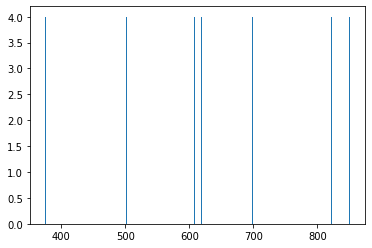

In [ ]:
import matplotlib.pyplot as plt
plt.bar (df['CreditScore'],4)

**BIVARIENT ANALYSIS**

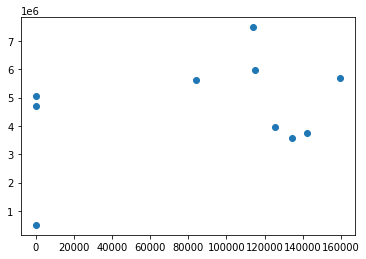

In [ ]:
plt.scatter(df['Balance'],df['EstimatedSalary']*50)

**MULTIVARIENT ANALYSIS**

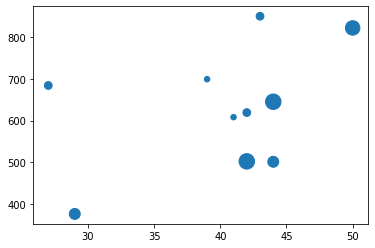

In [ ]:

plt.scatter(df['Age'],df['CreditScore'],df['Tenure']*30)

**4)PERFORM DESCRIPTIVE STATISTICS ON THE DATASET**

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


5)   **HANDLING THE MISSING VALUES**

In [ ]:
data.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**6) FIND THE OUTLIERS AND REPLACE THE OUTLIERS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


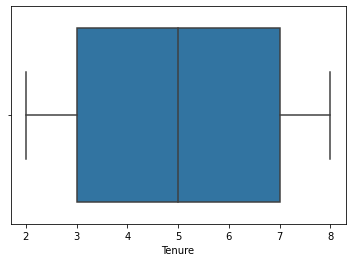

In [ ]:
sns.boxplot(data['Tenure'])


**REMOVING OUTLIERS**

In [ ]:
q=data.quantile(q=[0.75,0.5])


In [ ]:
iqr=q.iloc[0]-q.iloc[1]

In [ ]:
iqr

RowNumber           2499.7500
CustomerId         62495.7500
Surname              696.2500
CreditScore           66.0000
Geography              1.0000
Gender                 1.0000
Age                    7.0000
Tenure                 2.0000
Balance            30445.7000
NumOfProducts          1.0000
HasCrCard              0.0000
IsActiveMember         0.0000
EstimatedSalary    49194.3325
Exited                 0.0000
dtype: float64

In [ ]:
q=data.quantile(q=[0.75,0.5])

In [ ]:
iqr=q.iloc[0]-q.iloc[1]

In [ ]:
iqr

RowNumber           2499.7500
CustomerId         62495.7500
CreditScore           66.0000
Age                    7.0000
Tenure                 2.0000
Balance            30445.7000
NumOfProducts          1.0000
HasCrCard              0.0000
IsActiveMember         0.0000
EstimatedSalary    49194.3325
Exited                 0.0000
dtype: float64

In [ ]:
l=q.iloc[1]-(1.5*iqr)

In [ ]:
l['Tenure']

2.0

In [ ]:
u=q.iloc[1]+(1.5*iqr)
u['Tenure']

8.0

In [ ]:

data['Tenure']=np.where(data['Tenure']>u['Tenure'],u['Tenure'],np.where(data['Tenure']<l['Tenure'],l['Tenure'],data['Tenure']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


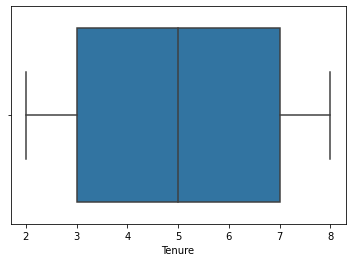

In [ ]:
sns.boxplot(data['Tenure'])

**7) CHECK FOR CATEGORICAL COLUMNS AND PERFORM ENCODING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as count

In [ ]:
le=LabelEncoder()

In [ ]:
data['Geography']=le.fit_transform(data['Geography'])

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,2.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,2.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,8.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


**8)Split the data into dependent and independent variables**

In [ ]:
x=data.iloc[:,0:13]
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,619,0,1,42,2.0,0.00,1,1,1,101348.88
1,2,15647311,1177,608,2,1,41,2.0,83807.86,1,0,1,112542.58
2,3,15619304,2040,502,0,1,42,8.0,159660.80,3,1,0,113931.57
3,4,15701354,289,699,0,1,39,2.0,0.00,2,0,0,93826.63
4,5,15737888,1822,850,2,1,43,2.0,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,0,39,5.0,0.00,2,1,0,96270.64
9996,9997,15569892,1336,516,0,0,35,8.0,57369.61,1,1,1,101699.77
9997,9998,15584532,1570,709,0,1,36,7.0,0.00,1,0,1,42085.58
9998,9999,15682355,2345,772,1,0,42,3.0,75075.31,2,1,0,92888.52


**DEPENDENT VARIABLES**

In [ ]:
y=data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

**9)SCALING THE INDEPENDENT VARIABLES**


In [ ]:
from sklearn.preprocessing import scale

In [ ]:
scale(x)


array([[-1.73187761, -0.78321342, -0.46418322, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.60653412, -0.3909112 , ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -0.99588476,  0.62898807, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.47928179,  0.07353887, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11935577,  0.98943914, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.87055909,  1.4692527 , ...,  0.64609167,
        -1.03067011, -1.07636976]])

**10)SPLIT THE DATA INTO TRAINING AND TESTING**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1345,1346,15714567,449,568,2,1,26,6.0,0.00,2,0,0,166495.20
511,512,15761043,1643,632,1,1,38,6.0,86569.76,2,1,0,98090.91
3609,3610,15657868,2407,850,1,0,40,6.0,94607.08,1,1,0,36690.49
7826,7827,15647838,678,648,1,1,51,2.0,116574.84,1,1,0,4121.04
9156,9157,15679551,595,504,2,1,46,2.0,163764.84,1,1,1,165122.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,8946,15616745,1228,542,2,0,35,2.0,174894.53,1,1,1,22314.55
1319,1320,15763612,2567,756,1,0,41,2.0,124439.49,2,0,1,47093.11
4008,4009,15612505,1342,835,2,0,45,3.0,100212.13,1,1,0,152577.62
7174,7175,15785339,1081,640,0,1,50,8.0,117565.03,2,0,0,82559.77


In [ ]:
x_train.shape

(8000, 13)

In [ ]:
y_train

1345    0
511     0
3609    0
7826    1
9156    1
       ..
8945    0
1319    0
4008    0
7174    0
2151    1
Name: Exited, Length: 8000, dtype: int64

In [ ]:
y_train.shape


(8000,)